In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import pearsonr,ttest_ind, f_oneway
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Orange Quality Data (1).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [5]:
df.isna().sum()

,0
Size (cm),0
Weight (g),0
Brix (Sweetness),0
pH (Acidity),0
Softness (1-5),0
HarvestTime (days),0
Ripeness (1-5),0
Color,0
Variety,0
Blemishes (Y/N),0


In [6]:
df.min()

,0
Size (cm),6.0
Weight (g),100
Brix (Sweetness),5.5
pH (Acidity),2.8
Softness (1-5),1.0
HarvestTime (days),4
Ripeness (1-5),1.0
Color,Deep Orange
Variety,Ambiance
Blemishes (Y/N),N


In [7]:
df.max()

,0
Size (cm),10.0
Weight (g),300
Brix (Sweetness),16.0
pH (Acidity),4.4
Softness (1-5),5.0
HarvestTime (days),25
Ripeness (1-5),5.0
Color,Yellow-Orange
Variety,Washington Navel
Blemishes (Y/N),Y (Sunburn)


In [8]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [10]:
df.tail()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0
240,7.3,282,10.5,2.9,4.0,21,2.0,Orange-Red,Jaffa,Y (Minor),4.0


In [11]:
df.shape

(241, 11)

In [12]:
df.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')

In [13]:
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [15]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


In [17]:
df.isnull()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
236,False,False,False,False,False,False,False,False,False,False,False
237,False,False,False,False,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.items()

<generator object DataFrame.items at 0x7bb6cb0b06d0>

In [20]:
df.Color

,Color
0,Orange
1,Deep Orange
2,Light Orange
3,Orange-Red
4,Orange
...,...
236,Orange-Red
237,Light Orange
238,Deep Orange
239,Light Orange


##1) Is there a correlation between the size (Size (cm)) and the weight (Weight (g)) of the fruit?


Columns: Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')


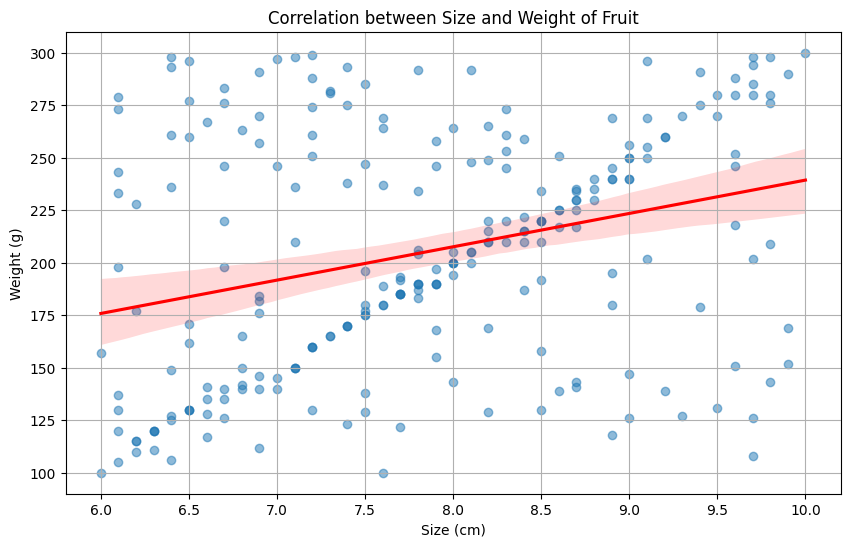

Pearson correlation coefficient: 0.31
P-value: 0.0000
There is a statistically significant correlation.


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



# Display column names to confirm the fields
print("Columns:", df.columns)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Size (cm)', y='Weight (g)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Correlation between Size and Weight of Fruit')
plt.xlabel('Size (cm)')
plt.ylabel('Weight (g)')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
corr, p_value = pearsonr(df['Size (cm)'], df['Weight (g)'])
print(f'Pearson correlation coefficient: {corr:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("There is no statistically significant correlation.")


##2) How does the sweetness (Brix) of the fruit correlate with its acidity (pH)? Do sweeter fruits have lower acidity?


Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Variety', 'Blemishes (Y/N)', 'Quality (1-5)'],
      dtype='object')


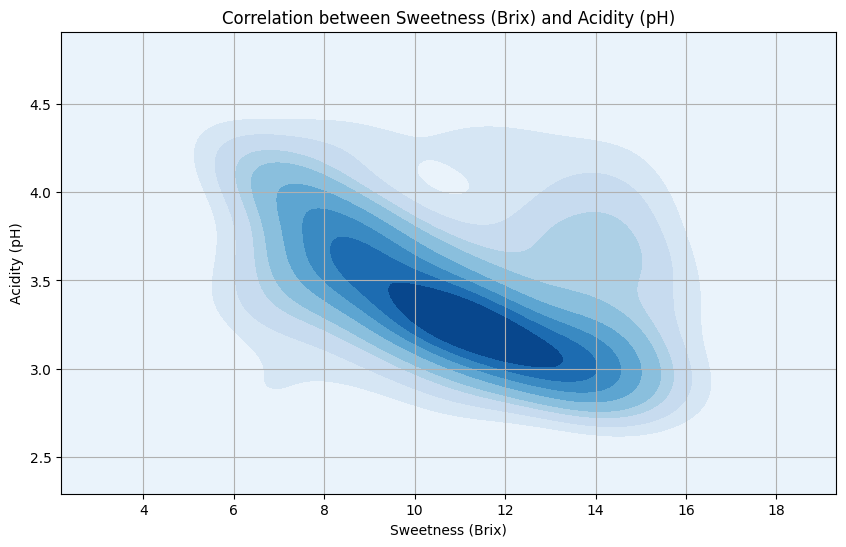

Pearson correlation coefficient: -0.30
P-value: 0.0000
There is a statistically significant correlation.


In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Ensure column names are correct
print(df.columns)  # Print column names to verify


# Scatter plot with regression line
plt.figure(figsize=(10, 6))
# Replace 'Brix' and 'pH' with actual column names from df.columns if different
sns.kdeplot(x=df['Brix (Sweetness)'], y=df['pH (Acidity)'], fill=True, cmap="Blues", thresh=0)   #kenal density estimation.
plt.title('Correlation between Sweetness (Brix) and Acidity (pH)')
plt.xlabel('Sweetness (Brix)')
plt.ylabel('Acidity (pH)')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
# Replace 'Brix' and 'pH' with actual column names if different
corr, p_value = pearsonr(df['Brix (Sweetness)'], df['pH (Acidity)'])
print(f'Pearson correlation coefficient: {corr:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("There is no statistically significant correlation.")


##3) How does the softness (Softness (1-5)) of the fruit relate to its ripeness (Ripeness (1-5))?


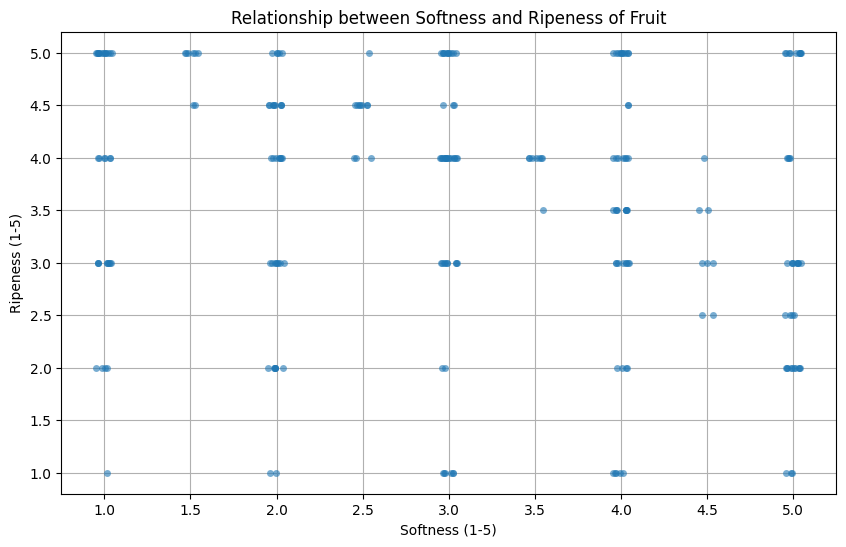

Spearman correlation coefficient: -0.21
P-value: 0.0009
There is a statistically significant correlation.


In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr



# Scatter plot with jitter to avoid overlap
plt.figure(figsize=(10, 6))
sns.stripplot(x='Softness (1-5)', y='Ripeness (1-5)', data=df, jitter=True, alpha=0.6)  #categorical scatter plot.
plt.title('Relationship between Softness and Ripeness of Fruit')
plt.xlabel('Softness (1-5)')
plt.ylabel('Ripeness (1-5)')
plt.grid(True)
plt.show()

# Calculate Spearman correlation
corr, p_value = spearmanr(df['Softness (1-5)'], df['Ripeness (1-5)'])
print(f'Spearman correlation coefficient: {corr:.2f}')
print(f'P-value: {p_value:.4f}')

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant correlation.")
else:
    print("There is no statistically significant correlation.")


##4) Do fruits with blemishes (Blemishes (Y/N)) tend to have lower ripeness or softness levels?


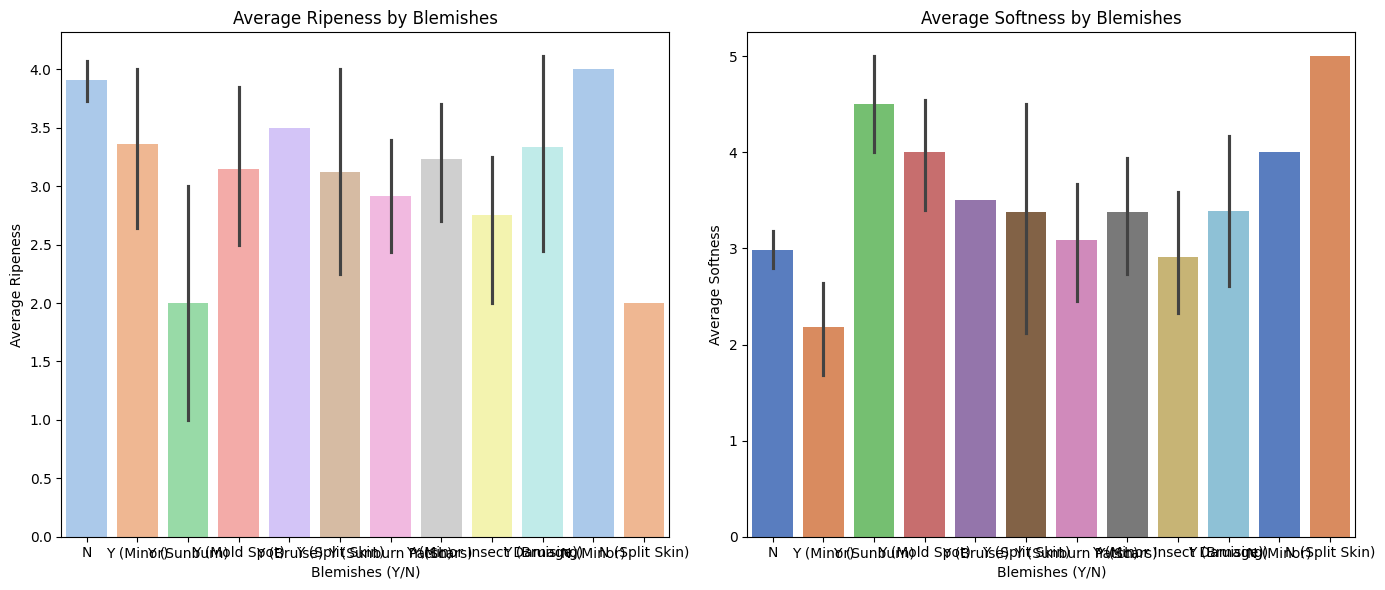

Average Ripeness and Softness by Blemishes:
            Blemishes (Y/N)  Ripeness (1-5)  Softness (1-5)
0                         N        3.906040        2.986577
1                 N (Minor)        4.000000        4.000000
2            N (Split Skin)        2.000000        5.000000
3                Y (Bruise)        3.500000        3.500000
4              Y (Bruising)        3.333333        3.388889
5   Y (Minor Insect Damage)        2.750000        2.916667
6                 Y (Minor)        3.357143        2.178571
7             Y (Mold Spot)        3.150000        4.000000
8                 Y (Scars)        3.235294        3.382353
9            Y (Split Skin)        3.125000        3.375000
10        Y (Sunburn Patch)        2.913043        3.086957
11              Y (Sunburn)        2.000000        4.500000

Fruits with blemishes do not have significantly lower ripeness.
Fruits with blemishes do not have significantly lower softness.


In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group by Blemishes and calculate average Ripeness and Softness
blemish_stats = df.groupby('Blemishes (Y/N)').agg({'Ripeness (1-5)': 'mean', 'Softness (1-5)': 'mean'}).reset_index()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ripeness comparison
sns.barplot(x='Blemishes (Y/N)', y='Ripeness (1-5)', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Average Ripeness by Blemishes')
axes[0].set_ylabel('Average Ripeness')
axes[0].set_xlabel('Blemishes (Y/N)')

# Softness comparison
sns.barplot(x='Blemishes (Y/N)', y='Softness (1-5)', data=df, ax=axes[1], palette='muted')
axes[1].set_title('Average Softness by Blemishes')
axes[1].set_ylabel('Average Softness')
axes[1].set_xlabel('Blemishes (Y/N)')

plt.tight_layout()
plt.show()

# Display the stats
print("Average Ripeness and Softness by Blemishes:")
print(blemish_stats)

# Interpretation
if blemish_stats['Ripeness (1-5)'].iloc[0] > blemish_stats['Ripeness (1-5)'].iloc[1]:
    print("\nFruits with blemishes tend to have lower ripeness.")
else:
    print("\nFruits with blemishes do not have significantly lower ripeness.")

if blemish_stats['Softness (1-5)'].iloc[0] > blemish_stats['Softness (1-5)'].iloc[1]:
    print("Fruits with blemishes tend to have lower softness.")
else:
    print("Fruits with blemishes do not have significantly lower softness.")


##5) How do different fruit varieties (Variety) differ in terms of size, weight, sweetness, acidity, and ripeness?

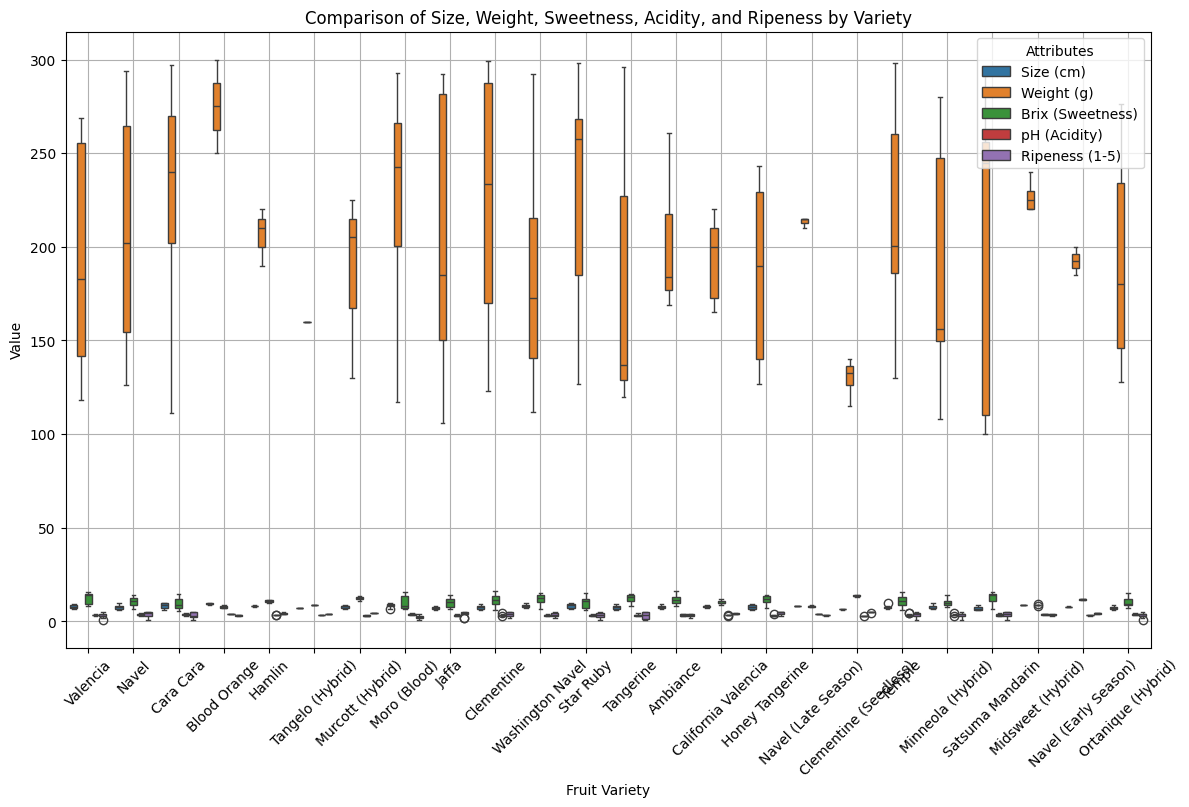


Summary Statistics by Variety:
                  Variety Size (cm)            Weight (g)             \
                               mean       std        mean        std   
0                Ambiance  7.827273  0.912240  198.000000  30.987094   
1            Blood Orange  9.500000  0.707107  275.000000  35.355339   
2     California Valencia  7.885714  0.481070  192.857143  22.704101   
3               Cara Cara  8.419048  1.338140  227.095238  53.355323   
4              Clementine  7.578571  0.976003  225.000000  63.351280   
5   Clementine (Seedless)  6.500000  0.216025  130.000000  10.801234   
6                  Hamlin  8.160000  0.270185  207.000000  12.041595   
7         Honey Tangerine  7.742857  1.171690  185.571429  49.668424   
8                   Jaffa  7.090909  0.684769  200.909091  72.464411   
9       Midsweet (Hybrid)  8.660000  0.181659  227.000000   8.366600   
10      Minneola (Hybrid)  7.683333  1.239379  192.000000  60.663004   
11           Moro (Blood)  8.475

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Melt the dataset to make it suitable for comparison
# Updated value_vars to use the actual column names from the DataFrame
melted_df = df.melt(id_vars='Variety',
                     value_vars=['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Ripeness (1-5)'], # Changed 'Brix' to 'Brix (Sweetness)' and 'pH' to 'pH (Acidity)'
                     var_name='Attribute',
                     value_name='Value')

# Plotting
plt.figure(figsize=(14, 8))
sns.boxplot(x='Variety', y='Value', hue='Attribute', data=melted_df)
plt.title('Comparison of Size, Weight, Sweetness, Acidity, and Ripeness by Variety')
plt.xlabel('Fruit Variety')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Attributes')
plt.grid(True)
plt.show()

# Summary statistics by variety
summary_stats = df.groupby('Variety').agg({
    'Size (cm)': ['mean', 'std'],
    'Weight (g)': ['mean', 'std'],
    'Brix (Sweetness)': ['mean', 'std'],  # Changed 'Brix' to 'Brix (Sweetness)'
    'pH (Acidity)': ['mean', 'std'],  # Changed 'pH' to 'pH (Acidity)'
    'Ripeness (1-5)': ['mean', 'std']
}).reset_index()

# Display the statistics
print("\nSummary Statistics by Variety:")
print(summary_stats)